In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Section1 :** **Exploratory Data Analysis(Using Full Dataset)**

For business-level insights,the full dataset is used without removing records to preserve total sales aggregation.

Load the dataset using source Kaggle

In [3]:
df_original=pd.read_csv('/kaggle/input/supermart-grocery-sales-retail-analytics-dataset/Supermart Grocery Sales - Retail Analytics Dataset.csv')
city_sales_original = df_original.groupby('City')['Sales'].sum().sort_values(ascending=False)
print(city_sales_original.head())

City
Kanyakumari    706764
Vellore        676550
Bodi           667177
Tirunelveli    659812
Perambalur     659738
Name: Sales, dtype: int64


As per the result : Kanyakumari as Highest Sales 
(This matches the PDF)

**Section-2 :** **Date Cleaning for Modeling**

**Load the Dataset**

In [4]:
df=pd.read_csv('/kaggle/input/supermart-grocery-sales-retail-analytics-dataset/Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [5]:
#Display the first five rows of the data
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [6]:
#Check the data type of each column of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


For predictive modeling,the 'order Date' column was converted to datetime format.Rows with invalid dates were removed to enable time-based extraction. 

In [8]:
#Let's change the datatype of Order Date form object to date

df['Order Date']=pd.to_datetime(df['Order Date'],errors='coerce')

print(df.isnull().sum())
  #If we don't drop we get null values

print(df['Order Date'])

Order ID            0
Customer Name       0
Category            0
Sub Category        0
City                0
Order Date       5952
Region              0
Sales               0
Discount            0
Profit              0
State               0
dtype: int64
0      2017-11-08
1      2017-11-08
2      2017-06-12
3      2016-10-11
4      2016-10-11
          ...    
9989          NaT
9990   2015-07-12
9991   2017-06-06
9992          NaT
9993          NaT
Name: Order Date, Length: 9994, dtype: datetime64[ns]


In [18]:
df.dropna(inplace=True)

print(df)

     Order ID Customer Name          Category      Sub Category         City  \
0         OD1        Harish      Oil & Masala           Masalas      Vellore   
1         OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2         OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3         OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4         OD5       Ridhesh       Food Grains   Organic Staples         Ooty   
...       ...           ...               ...               ...          ...   
9983   OD9984          Peer       Food Grains              Rice    Nagercoil   
9986   OD9987          Peer            Bakery          Biscuits      Vellore   
9988   OD9989       Jackson            Snacks           Cookies      Vellore   
9990   OD9991          Alan            Bakery          Biscuits  Kanyakumari   
9991   OD9992          Ravi       Food Grains              Rice         Bodi   

     Order Date Region  Sales  Discount

In [20]:
# changed to date data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4042 entries, 0 to 9991
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       4042 non-null   object        
 1   Customer Name  4042 non-null   object        
 2   Category       4042 non-null   object        
 3   Sub Category   4042 non-null   object        
 4   City           4042 non-null   object        
 5   Order Date     4042 non-null   datetime64[ns]
 6   Region         4042 non-null   object        
 7   Sales          4042 non-null   int64         
 8   Discount       4042 non-null   float64       
 9   Profit         4042 non-null   float64       
 10  State          4042 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 378.9+ KB


In [21]:
#applying groupby()function to group the data on Category.

da=df.groupby("Category")
da.first()

,Order ID,Customer Name,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
Category,,,,,,,,,,
Bakery,OD9,Hafiz,Biscuits,Tirunelveli,2015-06-09,West,791,0.23,181.93,Tamil Nadu
Beverages,OD2,Sudha,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu
"Eggs, Meat & Fish",OD12,Yadav,Eggs,Namakkal,2015-06-09,West,701,0.10,308.44,Tamil Nadu
Food Grains,OD3,Hussain,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu
Fruits & Veggies,OD4,Jackson,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu
Oil & Masala,OD1,Harish,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu
Snacks,OD11,Ganesh,Chocolates,Karur,2015-06-09,West,1903,0.13,437.69,Tamil Nadu


**Find the total sales by category**

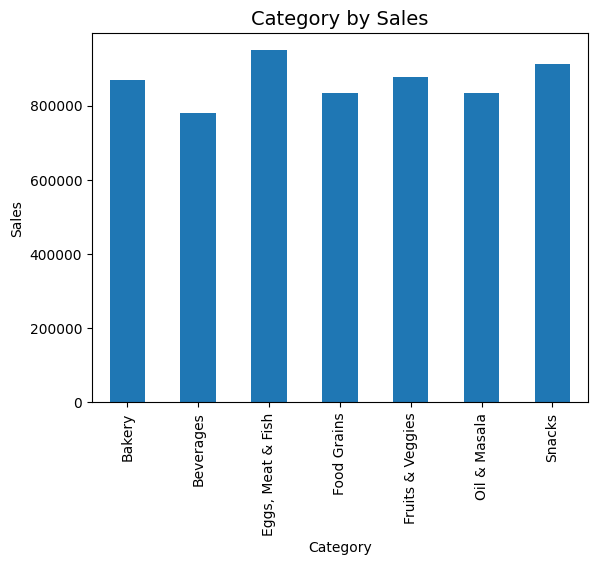

In [22]:
#firstly,we group by Category and get the total number of sales for each category

Sales_category=df.groupby('Category')['Sales'].sum()
#create a plot of sales by category

Sales_category.plot(kind='bar')
plt.title('Category by Sales',fontsize=14)
plt.xlabel('Category')
plt.ylabel('Sales')

plt.show()

**Observation :**

As per the chart the Egg,Meat & Fish Category contribute most to the sales ,it had about 15% of the total sales, so the company can invest more in it and other categories are almost similar in range.

In [23]:
#Extract month from the Order date
#Extract year from the Order date

df['month_no']=df['Order Date'].dt.month
df['Month']=pd.to_datetime(df['Order Date']).dt.strftime('%B')
df['year']=df['Order Date'].dt.year

print(df['month_no'])
print(df['Month'])
print(df['year'])

0       11
1       11
2        6
3       10
4       10
        ..
9983    12
9986     5
9988    11
9990     7
9991     6
Name: month_no, Length: 4042, dtype: int32
0       November
1       November
2           June
3        October
4        October
          ...   
9983    December
9986         May
9988    November
9990        July
9991        June
Name: Month, Length: 4042, dtype: object
0       2017
1       2017
2       2017
3       2016
4       2016
        ... 
9983    2017
9986    2018
9988    2016
9990    2015
9991    2017
Name: year, Length: 4042, dtype: int32


In [24]:
#check the date to view the added Columns 
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,month_no,Month,year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,11,November,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,11,November,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,6,June,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,10,October,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,10,October,2016


In [25]:
#Sum up sales by month
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

print(monthly_sales)

        Month   Sales
0       April  421442
1      August  361569
2    December  999661
3    February  196874
4     January  175986
5        July  412349
6        June  450453
7       March  371201
8         May  390694
9    November  932884
10    October  455396
11  September  884991


In [28]:
#Sort the data by month
monthly_sales_sorted=monthly_sales.sort_values(by='Month')

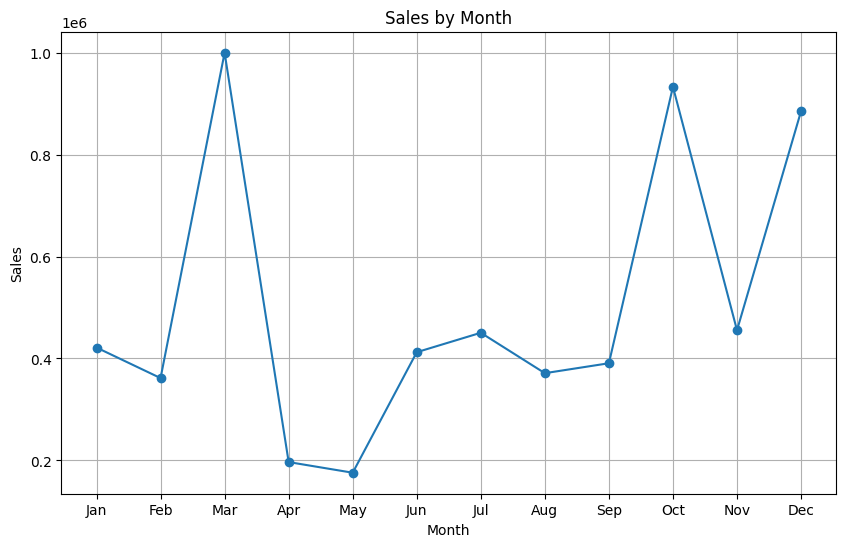

In [29]:
# Create the line Chart

plt.figure(figsize=(10,6))
plt.plot(monthly_sales_sorted['Month'],monthly_sales_sorted['Sales'],marker='o')
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(monthly_sales_sorted['Month'],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

plt.grid(True)
plt.show()

**Observation:**
As sales increase the month increases which shows the company devised better and suitable plan to increase sales at each point in time.

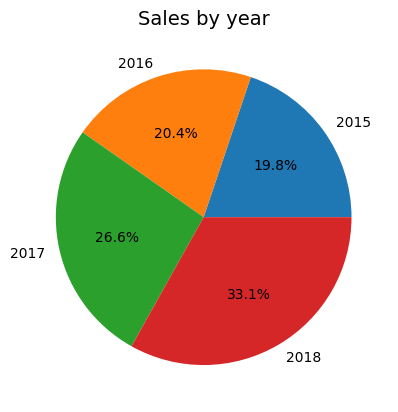

In [30]:
#We want to find the yearly Sales 
#We groupby year and get the total number of sales for each year

yearly_sales=df.groupby('year')['Sales'].sum()
#we create a pie chart with the sales by year

plt.pie(yearly_sales,labels=yearly_sales.index,autopct='%1.1f%%')
plt.title('Sales by year',fontsize=14)

#yearly_sales.plot(kind='pie')  #we we do this we only pie chart with title and years
#plt.title('yearly Sales',fontsize=14)

plt.show()


Observation :
The year 2017 and 2018 had more than 50 percent of the total sales which implies the sales increase as the year increases.

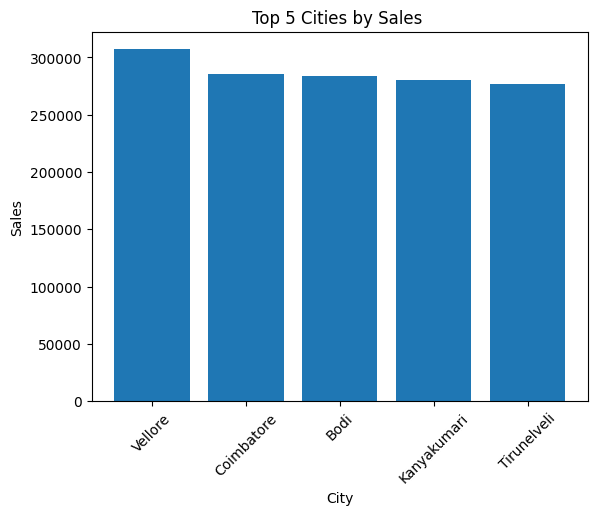

In [31]:
#LinkCode :

# Step1: Extract relevant columns
city_sales=df[['City','Sales']]

#step2 : Calculate total sales per city
total_sales=city_sales.groupby('City').sum()

#step3: Sort the cities by Sales
sorted_cities=total_sales.sort_values(by='Sales',ascending =False)

#Step4: Select the top 5cities 
top_cities=sorted_cities.head(5)

#Step5: Plot the bar chart
plt.bar(top_cities.index,top_cities['Sales'])
plt.xlabel('City')
plt.ylabel('Sales')

plt.title('Top 5 Cities by Sales ')
plt.xticks(rotation=45)
plt.show()

As per section 2 where rows with invalid dates were removed to enable time-based feature extraction (df.drop(subset=['Order Date'],inplace=True).

After Cleaning :

The above chart reflects 'Vellore' as highest sales.
here the change in ranking as occured because some records were removed during preprocessing,demonstrating how data cleaning can influence aggregated business metrics.